**Credit Worthiness Involving XAI**

In [ ]:
'''
USAGE OF LIME AND SHAP LIBRARIES:

Both of these external libraries will be used in this notebook for the purposes of involving Explainable AI (XAI) in our project. This will
help make model predictions more interpretable for non-technical people as it provides visualizations to explain models and its predictions.

'''

!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c0b0f114b3deada9999f2d34d4a3fa347c1532b839754565ea690f779dbb0e4f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


In [ ]:
'''USAGE OF IMBALANCED-LEARN LIBRARY:

Most of the credit-worthiness datasets are imbalanced as very few loan-applications go successful while applying for the loans. So, this results in
an imbalance in the dataset which further creates issues while training any classification model.

This library provides a technique named 'SMOTE' i.e., Synthetic Minority Over-Sampling Technique which uses interpolation of minority class to
create more samples of it and thus increasing the data samples of data and balancing target labels to 50/50 ratio

'''

!pip install imbalanced-learn

# Exploratory Data Analysis



> Textual Analysis of Data


> Visual Analysis of Data







Here are some samples of the dataset:

   case_no  age          job  marital  education default  balance housing  \
0        0   30   unemployed  married    primary      no     1787      no   
1        1   33     services  married  secondary      no     4789     yes   
2        2   35   management   single   tertiary      no     1350     yes   
3        3   30   management  married   tertiary      no     1476     yes   
4        4   59  blue-collar  married  secondary      no        0     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  cellular   19   oct        79         1     -1         0  unknown  no  
1  yes  cellular   11   may       220         1    339         4  failure  no  
2   no  cellular   16   apr       185         1    330         1  failure  no  
3  yes   unknown    3   jun       199         4     -1         0  unknown  no  
4   no   unknown    5   may       226         1     -1         0  unknown  no  

Here is the count

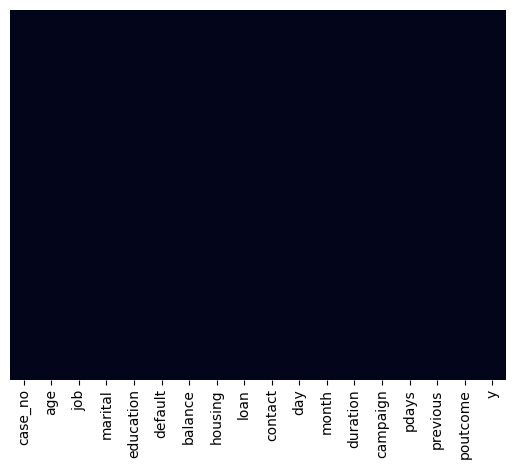


Here is the pie chart of label 'y' distribution:



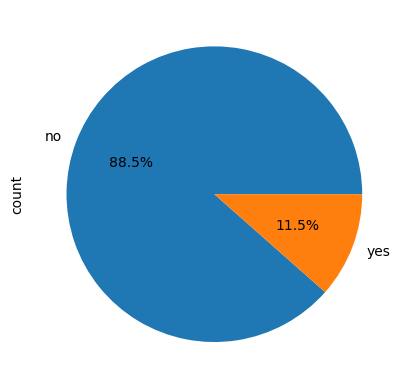


Here is the bar chart of Housing Feature's distribution:



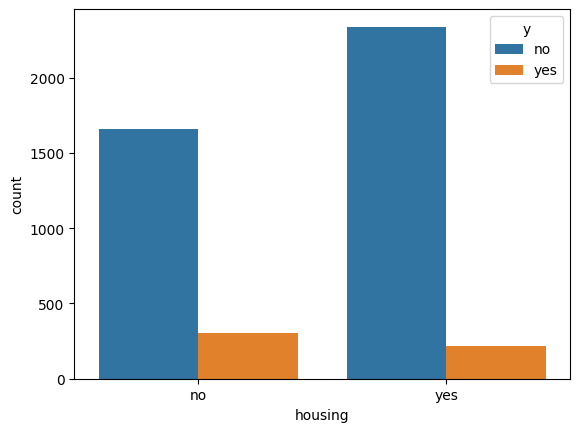


Here is the bar chart of Loan Feature's distribution:



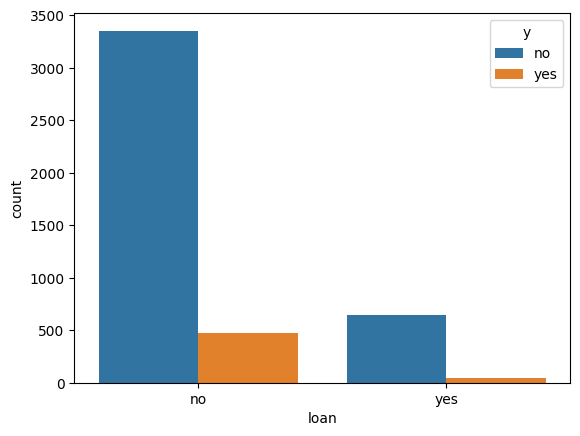


Here is the bar chart of Job Feature's distribution:



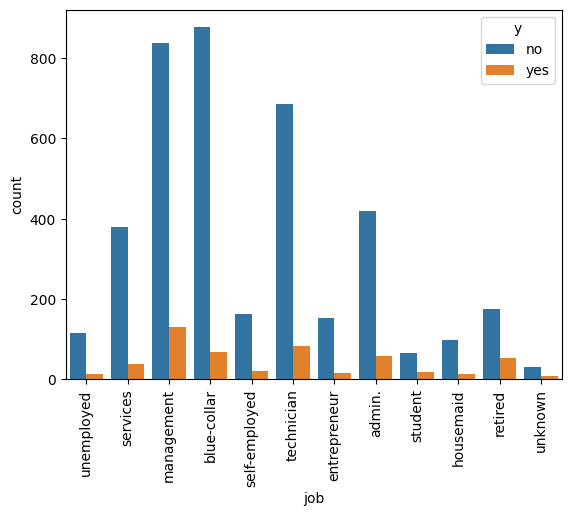


Here is the bar chart of Marital Feature's distribution:



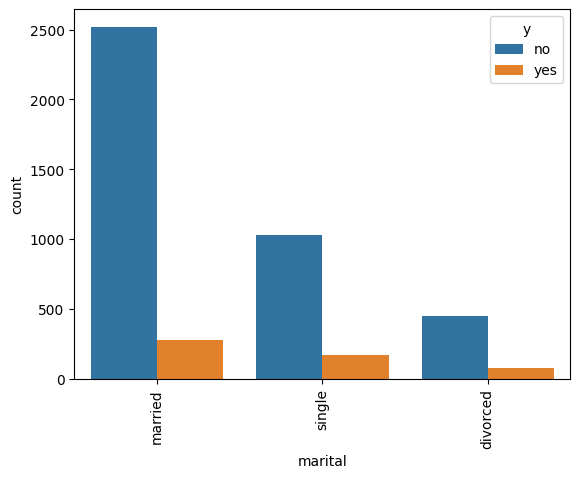


Here is the line plot of Balance Feature vs target label 'y':



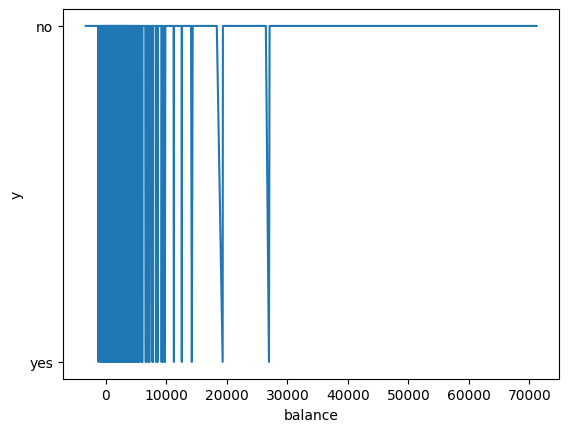

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
credit_data = pd.read_csv('credit_worthiness_data.csv')
print("Here are some samples of the dataset:\n")
print(credit_data.head())

# Missing values in dataset and their heatmap
print("\nHere is the count of missing values in every feature of dataset:\n")
print(credit_data.isnull().sum())
print("\nHere is the heatmap of missing values in dataset:\n")
sns.heatmap(credit_data.isnull(), yticklabels=False, cbar=False)
plt.show()

# Pie Chart of label 'y' distribution
print("\nHere is the pie chart of label 'y' distribution:\n")
values = credit_data['y'].value_counts()
values.plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Bar Chart of Housing Feature's distribution
print("\nHere is the bar chart of Housing Feature's distribution:\n")
sns.countplot(x='housing', hue='y', data=credit_data)
plt.show()

# Bar Chart of Loan Feature's distribution
print("\nHere is the bar chart of Loan Feature's distribution:\n")
sns.countplot(x='loan', hue='y', data=credit_data)
plt.show()

# Bar Chart of Job Feature's distribution
print("\nHere is the bar chart of Job Feature's distribution:\n")
sns.countplot(x='job', hue='y', data=credit_data)
plt.xticks(rotation=90)
plt.show()

# Bar Chart of Marital Feature's distribution
print("\nHere is the bar chart of Marital Feature's distribution:\n")
sns.countplot(x='marital', hue='y', data=credit_data)
plt.xticks(rotation=90)
plt.show()

# Line Plot of Balance Feature vs target label 'y'
print("\nHere is the line plot of Balance Feature vs target label 'y':\n")
sns.lineplot(x='balance', y='y', data=credit_data)
plt.show()





**Findings from Exploratory Data Analysis (EDA)**


*   Heatmap graph shows that there are no missing values in the dataset.


*   Pie chart shows that the dataset is imbalanced label-wise i.e., 88:12 ratio of 0's and 1's respectively. We'll make dataset balanced during data preprocessing phase.


*   Lineplot at the last shows that if bank balance of applicant is more than 30,000 then there is no chance that his loan application is accepted.











# Data Preprocessing



> Label Encoding (For categorical features)


> Standard Scaling (For numerical features)


> Data label balancing using SMOTE (Synthetic Minority Over-Sampling Technique)









In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

X = credit_data.drop(['case_no','age','y','day','month'], axis=1)
y = credit_data['y']
y = y.map({'no':0,'yes':1})
print("Number of data samples before balancing the dataset:", X.shape[0])
print("Number of negative labelled samples:", y[y==0].count())
print("Number of positive labelled samples:", y[y==1].count())

# Label encoding of categorical features
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Balancing the ratio of positive and negative samples of data using Synthetic
smote = SMOTE(sampling_strategy='auto', random_state=10)
X, y = smote.fit_resample(X, y)

print("\nNumber of data samples after balancing the dataset:", X.shape[0])
print("Number of negative labelled samples:", y[y==0].count())
print("Number of positive labelled samples:", y[y==1].count())

# Standard Scaling of numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

print("\nHere is the scaled dataset:\n")
print(X_scaled.head())



Number of data samples before balancing the dataset: 4521
Number of negative labelled samples: 4000
Number of positive labelled samples: 521

Number of data samples after balancing the dataset: 8000
Number of negative labelled samples: 4000
Number of positive labelled samples: 4000

Here is the scaled dataset:

        job   marital  education   default   balance   housing      loan  \
0  1.934506 -0.046795  -1.624928 -0.097934  0.105455 -0.828886 -0.315684   
1  0.915719 -0.046795  -0.201270 -0.097934  1.195670  1.206439  3.167725   
2 -0.103067  1.609661   1.222388 -0.097934 -0.053248  1.206439 -0.315684   
3 -0.103067 -0.046795   1.222388 -0.097934 -0.007489  1.206439  3.167725   
4 -1.121854 -0.046795  -0.201270 -0.097934 -0.543518  1.206439 -0.315684   

    contact  duration  campaign     pdays  previous  poutcome  
0 -0.562944 -0.886407 -0.546977 -0.491627 -0.405622  0.581892  
1 -0.562944 -0.478161 -0.546977  2.813045  1.998955 -2.302925  
2 -0.562944 -0.579499 -0.546977  2.725

# Model Selection




> Training seven different classification models

    1.   Logistic Regression

    2.   Support Vector Machines (SVM)

    3.   Decision Tree Classifier

    4.   Random Forest Classifier

    5.   K - Nearest Neighbours (KNN)

    6.   Naive Bayes Classifier

    7.   Xtreme Gradient Descent Boost (XG Boost)



> Evaluating all the models using


    1.   Confusion Matrix
    2.   Classification Report (Accuracy, Recall, Precision, F1 Score)



> Selecting the best model as per evaluation results


















Training Logistic Regression ...
Model Trained
{
    "train_accuracy": 0.85,
    "test_accuracy": 0.8458333333333333,
    "train_recall": 0.8678571428571429,
    "test_recall": 0.86,
    "train_precision": 0.8379310344827586,
    "test_precision": 0.8363047001620746,
    "train_f1": 0.8526315789473684,
    "test_f1": 0.847986852917009
}

Here is the confusion matrix of training data:



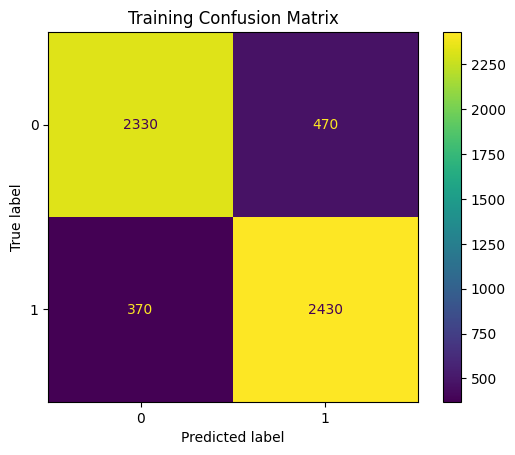


Here is the confusion matrix of testing data:



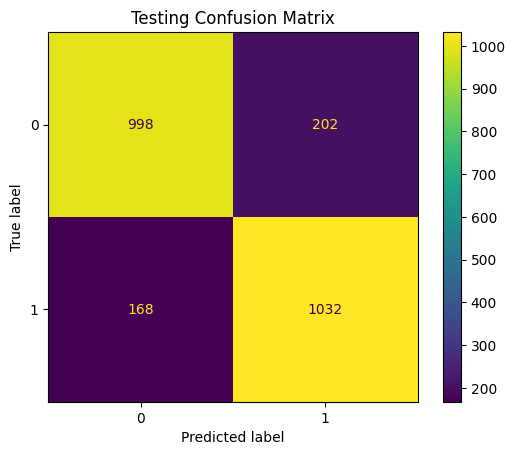


Here is the classification report of training data:



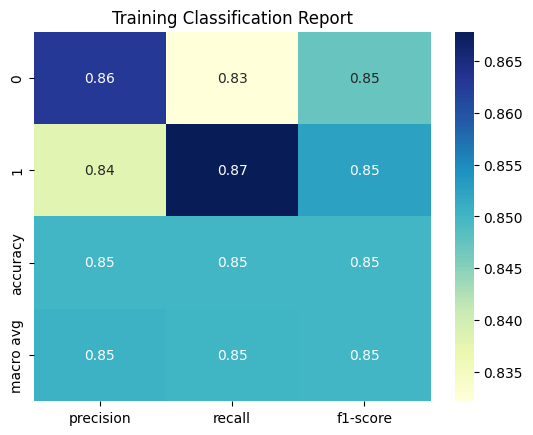


Here is the classification report of testing data:



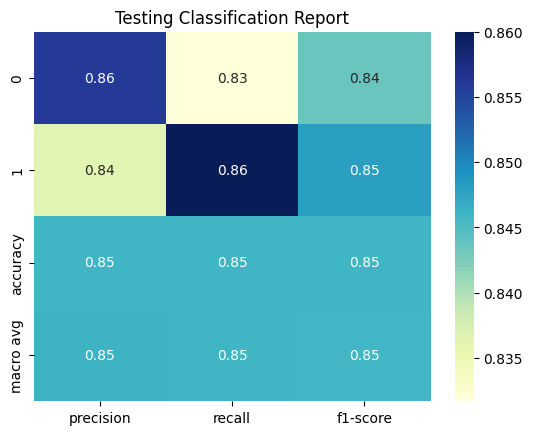


Training SVM ...
Model Trained
{
    "train_accuracy": 0.8973214285714286,
    "test_accuracy": 0.88125,
    "train_recall": 0.9164285714285715,
    "test_recall": 0.9083333333333333,
    "train_precision": 0.8826969384244926,
    "test_precision": 0.8616600790513834,
    "train_f1": 0.8992465393376555,
    "test_f1": 0.8843813387423934
}

Here is the confusion matrix of training data:



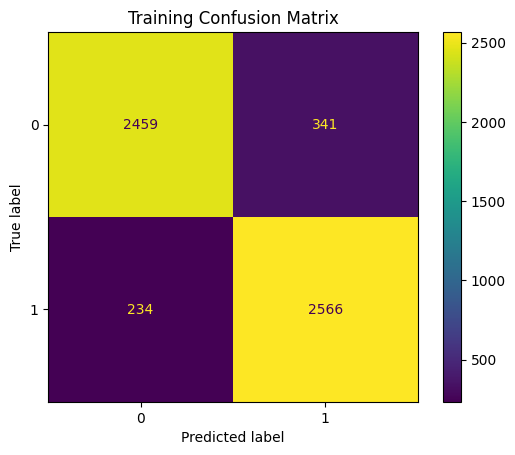


Here is the confusion matrix of testing data:



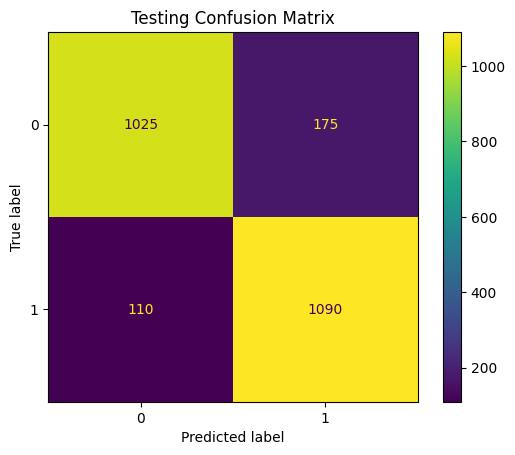


Here is the classification report of training data:



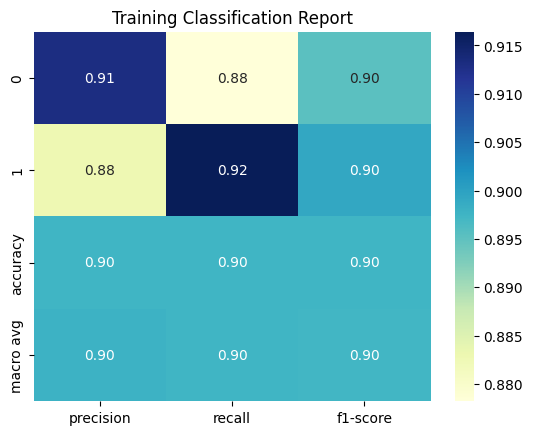


Here is the classification report of testing data:



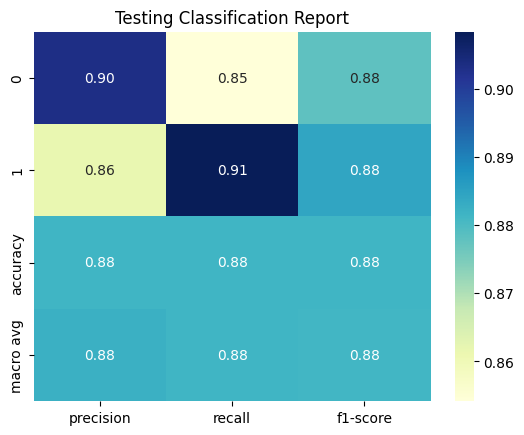


Training Decision Tree ...
Model Trained
{
    "train_accuracy": 1.0,
    "test_accuracy": 0.86625,
    "train_recall": 1.0,
    "test_recall": 0.88,
    "train_precision": 1.0,
    "test_precision": 0.8564476885644768,
    "train_f1": 1.0,
    "test_f1": 0.8680641183723797
}

Here is the confusion matrix of training data:



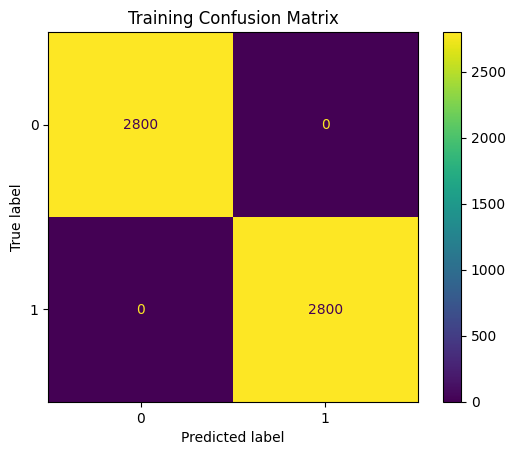


Here is the confusion matrix of testing data:



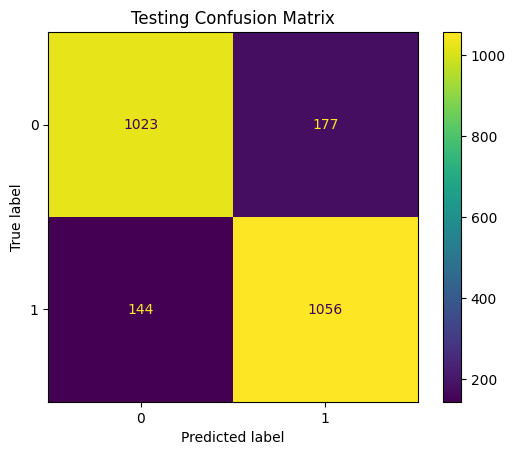


Here is the classification report of training data:



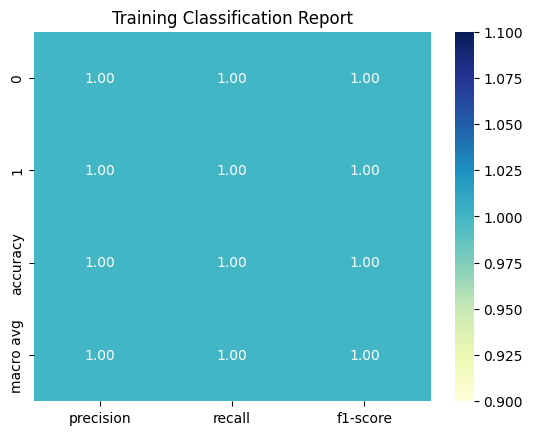


Here is the classification report of testing data:



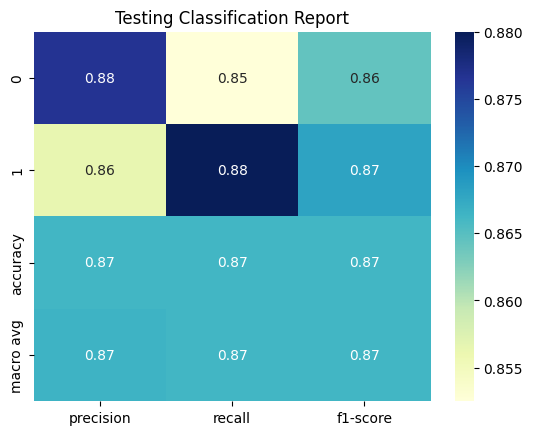


Training Random Forest ...
Model Trained
{
    "train_accuracy": 1.0,
    "test_accuracy": 0.9079166666666667,
    "train_recall": 1.0,
    "test_recall": 0.9341666666666667,
    "train_precision": 1.0,
    "test_precision": 0.88756927949327,
    "train_f1": 1.0,
    "test_f1": 0.9102720259845717
}

Here is the confusion matrix of training data:



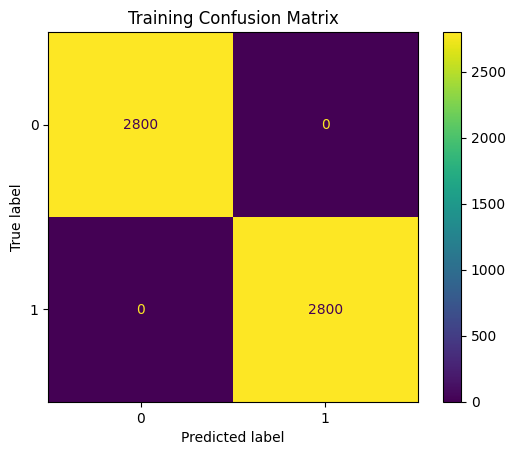


Here is the confusion matrix of testing data:



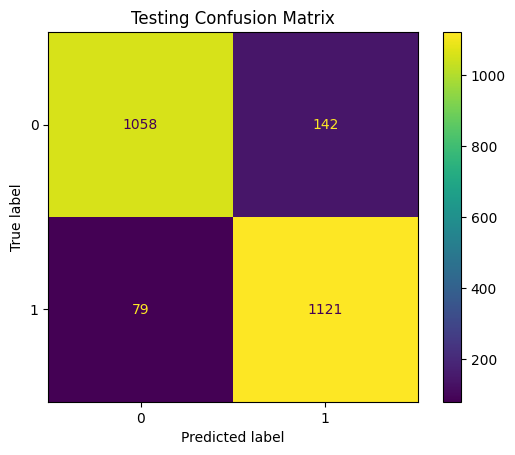


Here is the classification report of training data:



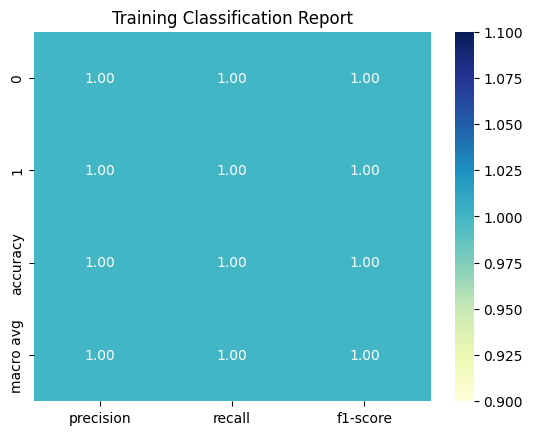


Here is the classification report of testing data:



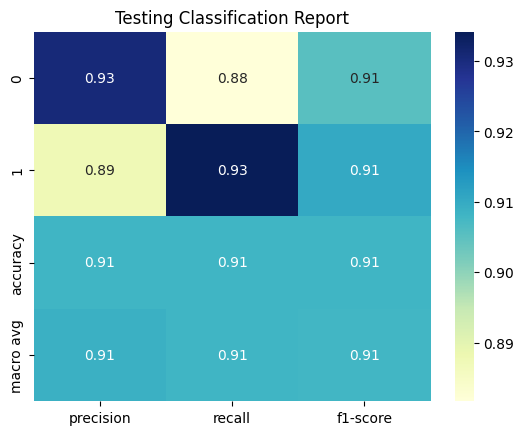


Training KNN ...
Model Trained
{
    "train_accuracy": 0.9092857142857143,
    "test_accuracy": 0.8775,
    "train_recall": 0.9367857142857143,
    "test_recall": 0.9141666666666667,
    "train_precision": 0.8879485443466486,
    "test_precision": 0.8517080745341615,
    "train_f1": 0.9117135905457073,
    "test_f1": 0.8818327974276529
}

Here is the confusion matrix of training data:



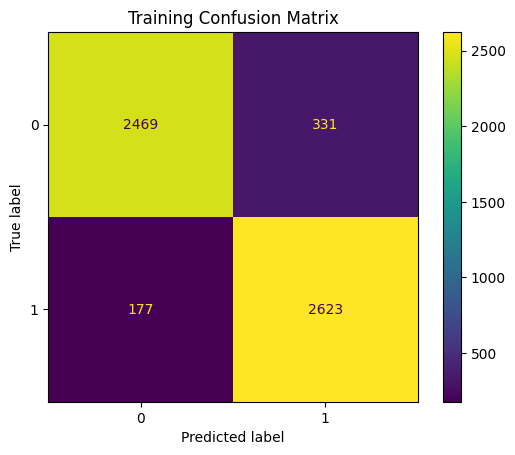


Here is the confusion matrix of testing data:



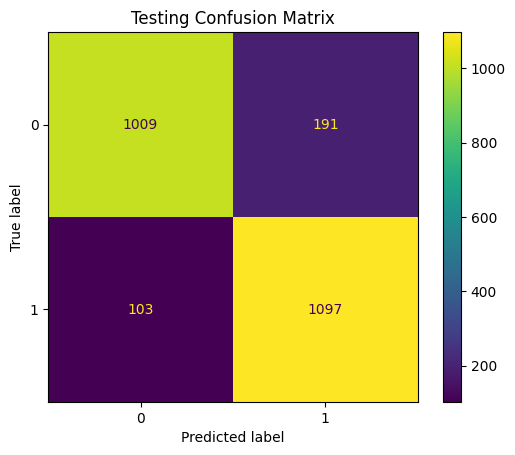


Here is the classification report of training data:



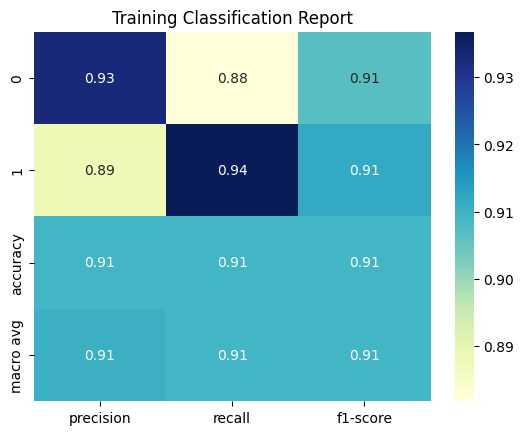


Here is the classification report of testing data:



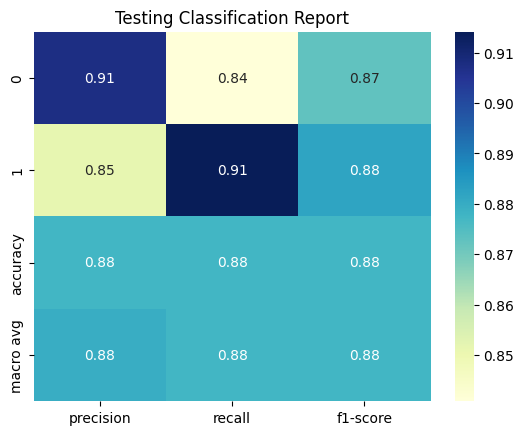


Training Naive Bayes ...
Model Trained
{
    "train_accuracy": 0.7444642857142857,
    "test_accuracy": 0.7291666666666666,
    "train_recall": 0.9367857142857143,
    "test_recall": 0.9425,
    "train_precision": 0.6765540366262575,
    "test_precision": 0.6606308411214953,
    "train_f1": 0.7856821926014679,
    "test_f1": 0.7767857142857142
}

Here is the confusion matrix of training data:



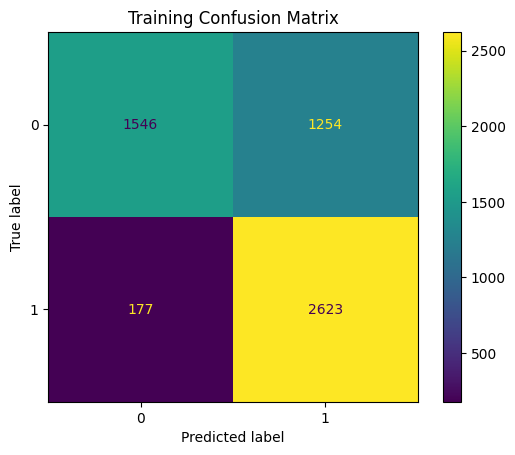


Here is the confusion matrix of testing data:



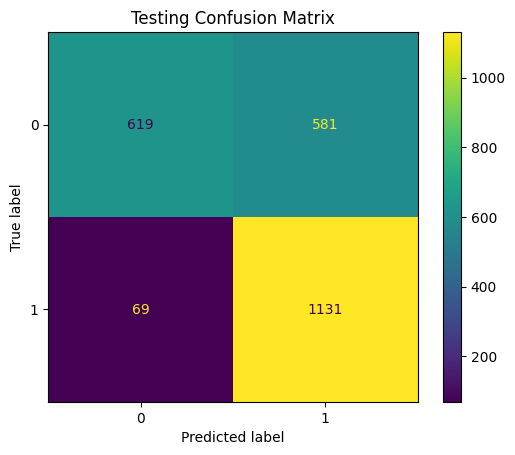


Here is the classification report of training data:



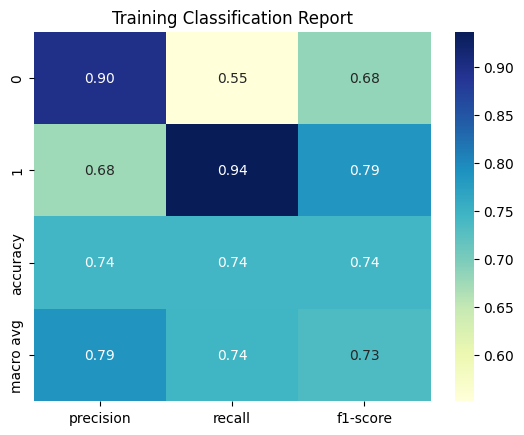


Here is the classification report of testing data:



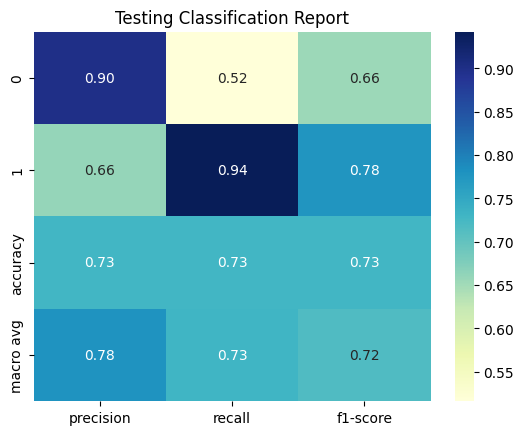


Training XG Boost ...
Model Trained
{
    "train_accuracy": 0.9898214285714285,
    "test_accuracy": 0.91,
    "train_recall": 0.9953571428571428,
    "test_recall": 0.9316666666666666,
    "train_precision": 0.98445778876722,
    "test_precision": 0.8929712460063898,
    "train_f1": 0.9898774640383591,
    "test_f1": 0.9119086460032626
}

Here is the confusion matrix of training data:



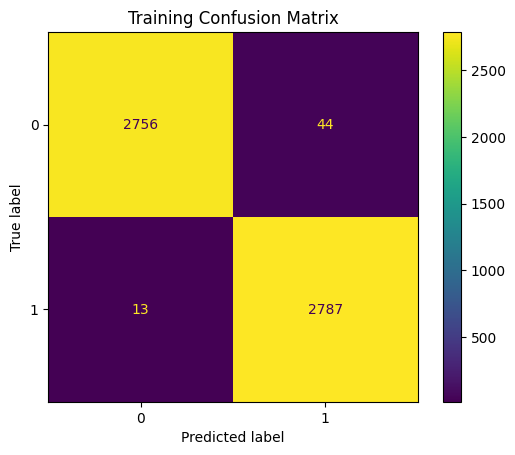


Here is the confusion matrix of testing data:



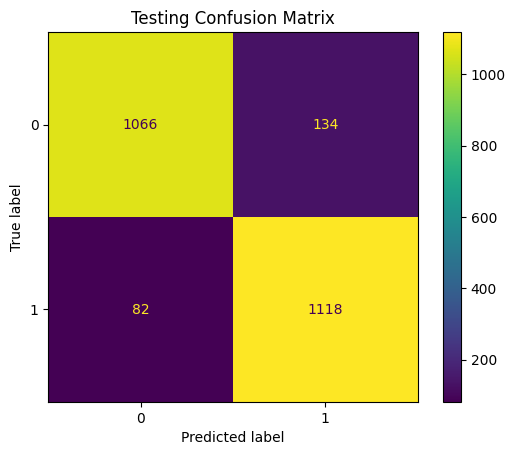


Here is the classification report of training data:



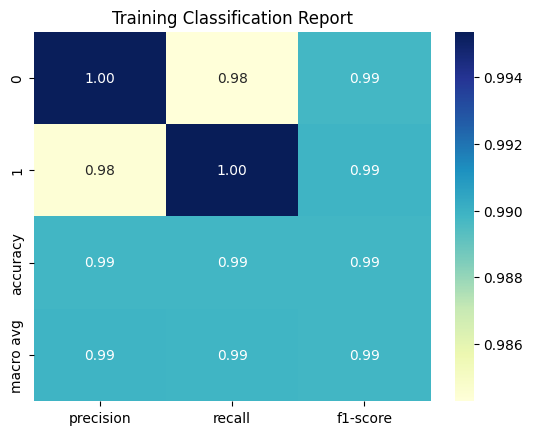


Here is the classification report of testing data:



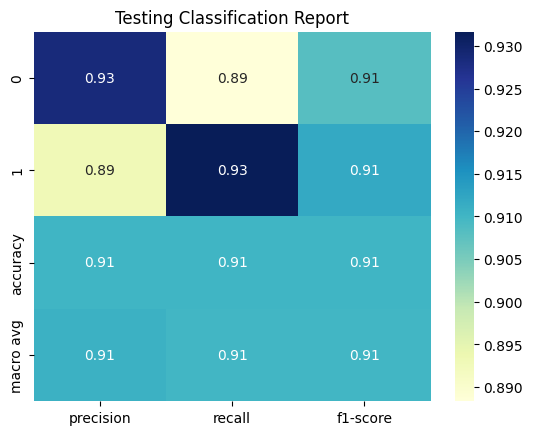

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import json

# Splitting data (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, shuffle=True, random_state=10)

# Method to train models
def train_model(model_name,model_obj,X_train,y_train):

  print("Training",model_name, "...")
  model_obj.fit(X_train, y_train)
  y_train_pred = model_obj.predict(X_train)
  y_test_pred = model_obj.predict(X_test)
  print("Model Trained")

  return y_train_pred, y_test_pred

# Method to evaluate models
results = {}
def evaluate_model(model_name,y_train,y_train_pred,y_test,y_test_pred):
  results[model_name] = {}
  results[model_name]['train_accuracy'] = accuracy_score(y_train, y_train_pred)
  results[model_name]['test_accuracy'] = accuracy_score(y_test, y_test_pred)
  results[model_name]['train_recall'] = recall_score(y_train, y_train_pred)
  results[model_name]['test_recall'] = recall_score(y_test, y_test_pred)
  results[model_name]['train_precision'] = precision_score(y_train, y_train_pred)
  results[model_name]['test_precision'] = precision_score(y_test, y_test_pred)
  results[model_name]['train_f1'] = f1_score(y_train, y_train_pred)
  results[model_name]['test_f1'] = f1_score(y_test, y_test_pred)

  return results

# Method to display results
def display_results(model_name, y_train,y_train_pred,y_test,y_test_pred):
  print(json.dumps(results[model_name], indent=4))

  # Display training confusion matrix
  print("\nHere is the confusion matrix of training data:\n")
  training_cm = confusion_matrix(y_train, y_train_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=training_cm)
  cm_display.plot()
  plt.title('Training Confusion Matrix')
  plt.show()

  # Display testing confusion matrix
  print("\nHere is the confusion matrix of testing data:\n")
  testing_cm = confusion_matrix(y_test, y_test_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=testing_cm)
  cm_display.plot()
  plt.title('Testing Confusion Matrix')
  plt.show()

  # Display training classification report
  print("\nHere is the classification report of training data:\n")
  training_report = classification_report(y_train, y_train_pred, output_dict=True)
  training_report = pd.DataFrame(training_report).transpose()
  sns.heatmap(training_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
  plt.title('Training Classification Report')
  plt.show()

  # Display testing classification report
  print("\nHere is the classification report of testing data:\n")
  testing_report = classification_report(y_test, y_test_pred, output_dict=True)
  testing_report = pd.DataFrame(testing_report).transpose()
  sns.heatmap(testing_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu',fmt='.2f')

  plt.title('Testing Classification Report')
  plt.show()

  print()

models = {
    'Logistic Regression':LogisticRegression(),
     'SVM':SVC(),
     'Decision Tree': DecisionTreeClassifier(),
     'Random Forest':RandomForestClassifier(),
     'KNN':KNeighborsClassifier(),
     'Naive Bayes':GaussianNB(),
      'XG Boost':XGBClassifier()
     }



for model_name, model_obj in models.items():
  # Training model
  y_train_pred, y_test_pred = train_model(model_name,model_obj,X_train,y_train)

  # Evaluating model
  evaluate_model(model_name,y_train,y_train_pred,y_test,y_test_pred)

  # Display Results
  display_results(model_name, y_train,y_train_pred,y_test,y_test_pred)




**Finding from Model Training and Selection**

It is evident from the depicted results that XG Boost algorithm whose results are shown at the last has performed best out of all the 7 classification algorithms and thus we'll go with XG Boost Classifier.


Although, the difference in training and testing classification reports show that the XG Boost algorithm has overfitted the training data a little.


So, to avoid overfitting, we will do some Hyperparameter tuning using Scikit-Learn's GridSearchCV method as it provides end-to-end Hyperparameter tuning and finding the best possible hyperparameters for the model.

**Selected Model: XG Boost**

# Model Training and Evaluation

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Model Training
# Hyperparameter tuning using GridSearchCV

hyperparameters_grid = {
    'n_estimators':[200],
    'reg_lambda': [0.01, 0.1, 1, 10, 100],
    'learning_rate': [0.05,0.1,0.2,0.4,0.6],
    'subsample': np.arange(0.1,1.0,0.3),
    'max_depth': [5,10,20],
    'colsample_bytree': np.arange(0.1,1.0,0.3),
    'gamma': np.arange(0.05,1.05,0.25),
  }

xgb = XGBClassifier(verbosity = 2)
grid_xgb = GridSearchCV(estimator=xgb,param_grid=hyperparameters_grid, cv = 2, verbose=1, n_jobs=-1)

print("Training XG Boost Classifier...")
grid_xgb.fit(X_train, y_train)
print("XG Boost Classifier Trained")


Training XG Boost Classifier...
Fitting 2 folds for each of 2700 candidates, totalling 5400 fits
XG Boost Classifier Trained


{'colsample_bytree': 0.4, 'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 200, 'reg_lambda': 0.1, 'subsample': 0.7000000000000001}
0.9144642857142857
{
    "train_accuracy": 0.9964285714285714,
    "test_accuracy": 0.9166666666666666,
    "train_recall": 0.9978571428571429,
    "test_recall": 0.9433333333333334,
    "train_precision": 0.9950142450142451,
    "test_precision": 0.8955696202531646,
    "train_f1": 0.9964336661911556,
    "test_f1": 0.9188311688311689
}

Here is the confusion matrix of training data:



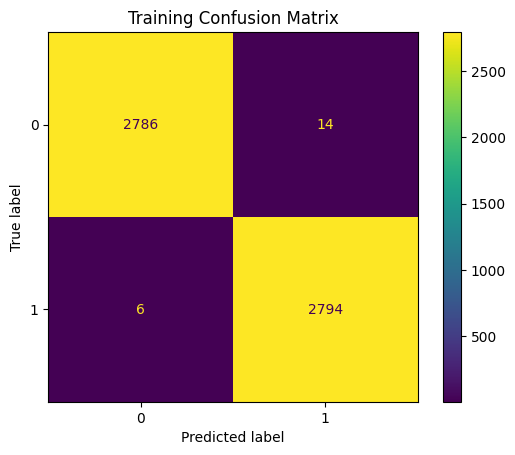


Here is the confusion matrix of testing data:



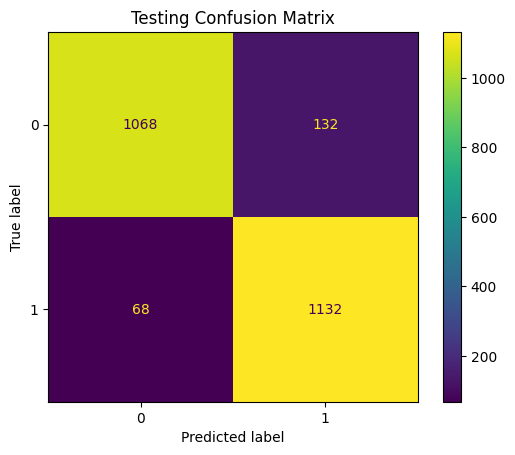


Here is the classification report of training data:



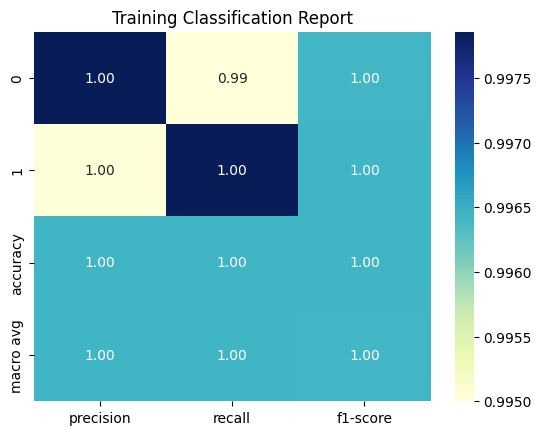


Here is the classification report of testing data:



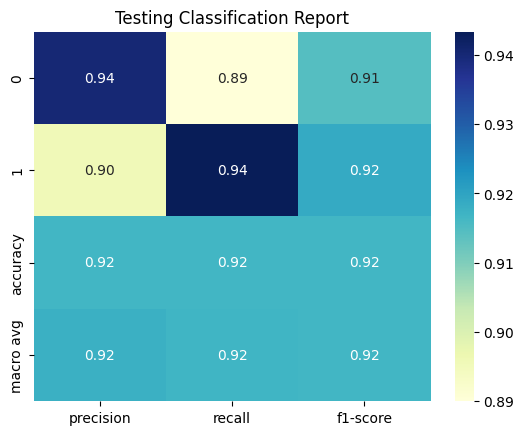

In [ ]:
# Model Evaluation
model_name = 'XG Boost Tuned'

print(grid_xgb.best_params_)
print(grid_xgb.best_score_)
xgb_estimator = grid_xgb.best_estimator_

y_train_pred = xgb_estimator.predict(X_train)
y_test_pred = xgb_estimator.predict(X_test)

evaluate_model(model_name,y_train,y_train_pred,y_test,y_test_pred)
# Display Evaluation
display_results(model_name, y_train,y_train_pred,y_test,y_test_pred)




# Model Explanation using XAI (Explainable AI)



> Using SHAP to explain feature importances of model







Model Explanation Under Process...

Here is the Summary Plot showing Feature Importances and their correlation with target label


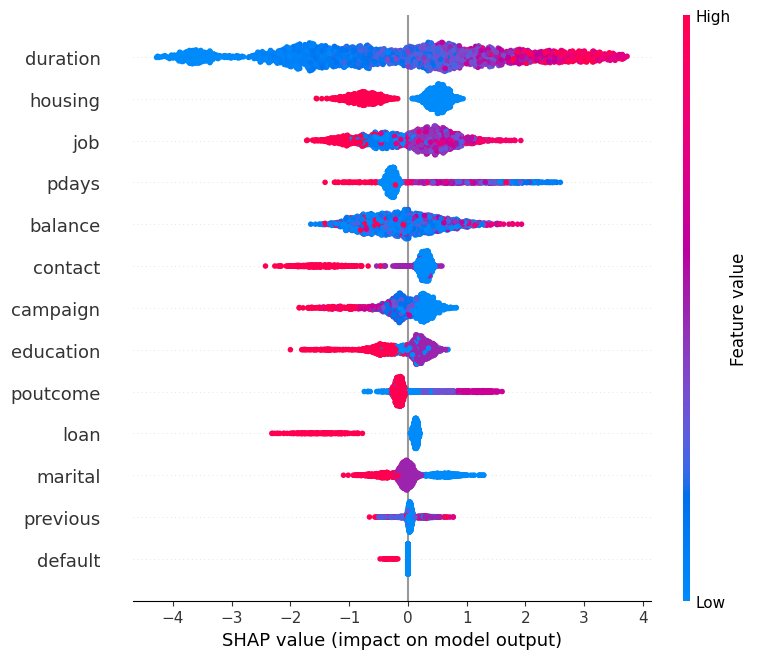


Here is the Bar Plot showing Feature Importances


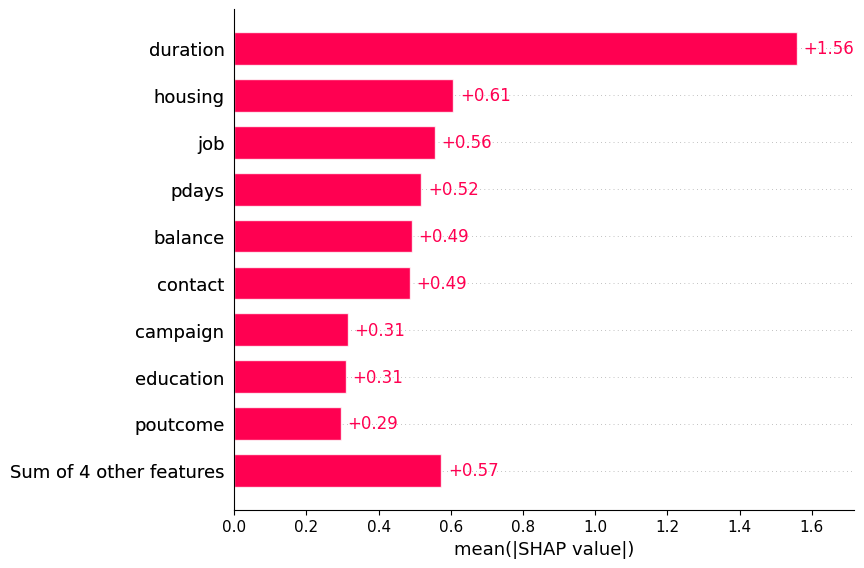

In [ ]:
import shap

model_explainer = shap.Explainer(xgb_estimator)

print("Model Explanation Under Process...")
shap_values = model_explainer(X_test)

print("\nHere is the Summary Plot showing Feature Importances and their correlation with target label")
shap.summary_plot(shap_values, X_test)

print("\nHere is the Bar Plot showing Feature Importances")
shap.plots.bar(shap_values)
